In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Plotting Dataset vs. Number of Epochs

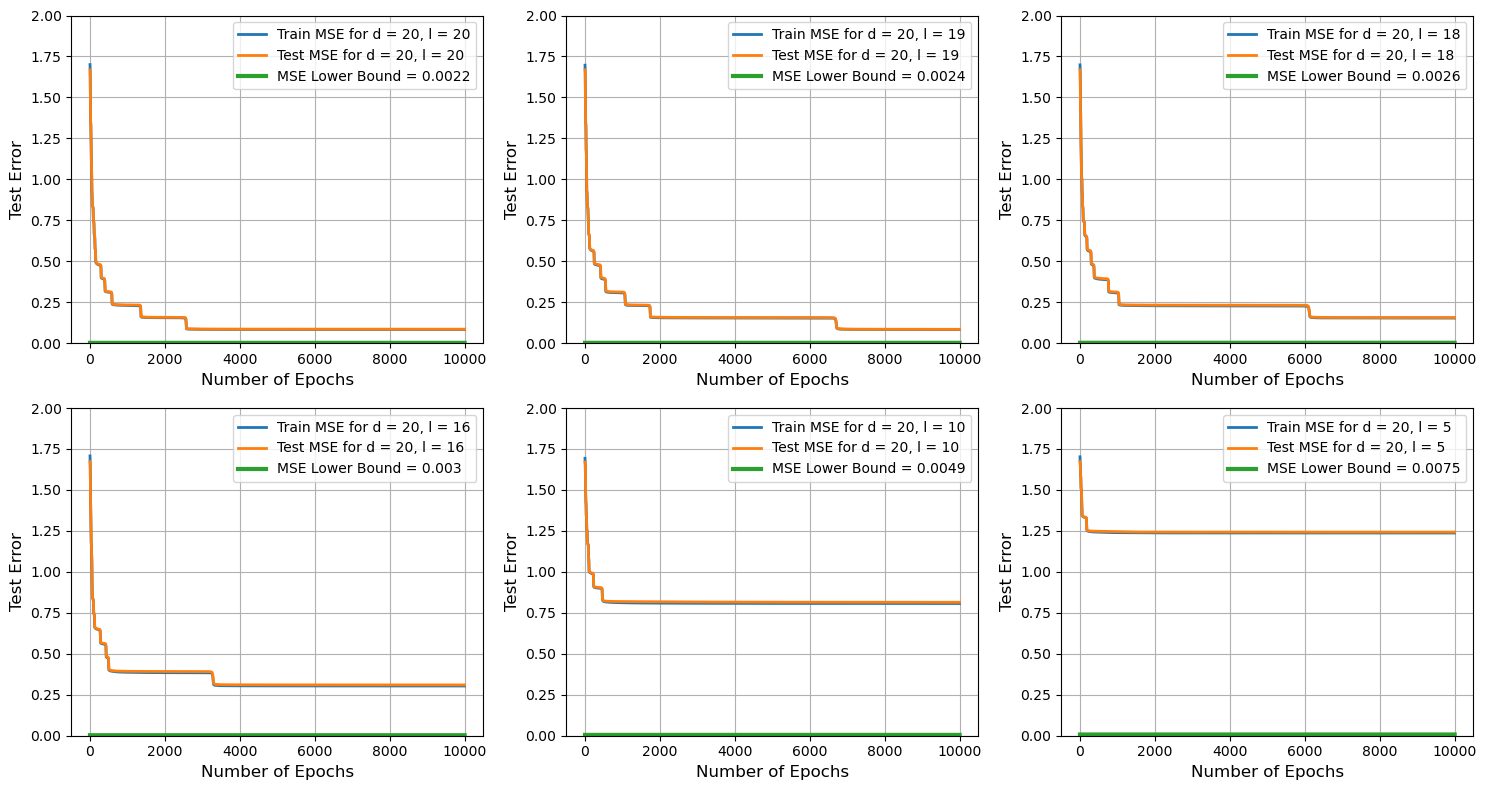

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize parameters
DatasetName = 'Uniform'
input_dim = 20 # 50
latent_dims = [20, 19, 18, 16, 10, 5] # [50, 48, 45, 40, 25, 10]
num_hidden = 0
train_size = 100000
batch_size = 1000
epochs = 10000
iterations = 1

# Creating a 2x3 subplot structure
fig, axs = plt.subplots(2, 3, figsize=(15, 8))  # Adjust the figure size as needed

# Flatten the axs array for easy iteration
axs = axs.flatten()

# Loop over latent dimensions and subplots
for i, latent_dim in enumerate(latent_dims):
    # Read X, Y, and Z for each latent_dim
    X = pd.read_csv(f'TRAIN_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
    Y = pd.read_csv(f'TEST_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
    Z = pd.read_csv(f'LB_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_NumHidden={num_hidden}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

    # Calculate mean and confidence interval for X
    mean_X = X.mean(axis=0)
    ci_X = 1.96 * X.std(axis=0) / len(X)  # Assuming 95% CI
    
    # Calculate mean and confidence interval for Y
    mean_Y = Y.mean(axis=0)
    ci_Y = 1.96 * Y.std(axis=0) / len(Y)  # Assuming 95% CI
    
    # Calculate mean and confidence interval for Z
    mean_Z = Z.mean(axis=0)
    
    # Plotting for Y on subplot i
    axs[i].fill_between(range(1, epochs + 1), mean_X - ci_X, mean_X + ci_X, alpha=0.1)
    axs[i].plot(range(1, epochs + 1), mean_X, '-', label=f"Train MSE for d = {input_dim}, l = {latent_dim}", linewidth=2)

    # Plotting for Y on subplot i
    axs[i].fill_between(range(1, epochs + 1), mean_Y - ci_Y, mean_Y + ci_Y, alpha=0.2)
    axs[i].plot(range(1, epochs + 1), mean_Y, '-', label=f"Test MSE for d = {input_dim}, l = {latent_dim}", linewidth=2)

    # Plotting for Z on subplot i
    axs[i].plot(range(1, epochs + 1), mean_Z, '-', label=f"MSE Lower Bound = {mean_Z[0].round(4)}", linewidth=3)

    # Additional settings for each subplot
    axs[i].set_xlabel("Number of Epochs", fontsize=12)
    axs[i].set_ylabel("Test Error", fontsize=12)
    axs[i].set_ylim(0,2) # (0,4.5)
    axs[i].legend(prop={'size': 10})
    axs[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
# # Step 1: Read the CSV files
# DatasetName = 'Uniform'
# input_dim = 50
# latent_dim = 25
# train_size = 100000
# batch_size = 1000
# epochs = 10000
# iterations = 1

# X = pd.read_csv(f'TRAIN_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
# Y = pd.read_csv(f'TEST_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values
# Z = pd.read_csv(f'LB_{DatasetName}_InputDim={input_dim}_LatentDim={latent_dim}_TrainSize={train_size}_BatchSize={batch_size}_Epochs={epochs}_Iterations={iterations}.csv', header=None).values

Mean MSE:       2.0015, STDEV MSE:      0.0
Mean MSE + L2:  2.0396, STDEV MSE + L2: 0.0
Mean RLP (100): 0.213, STDEV RLP:      0.0


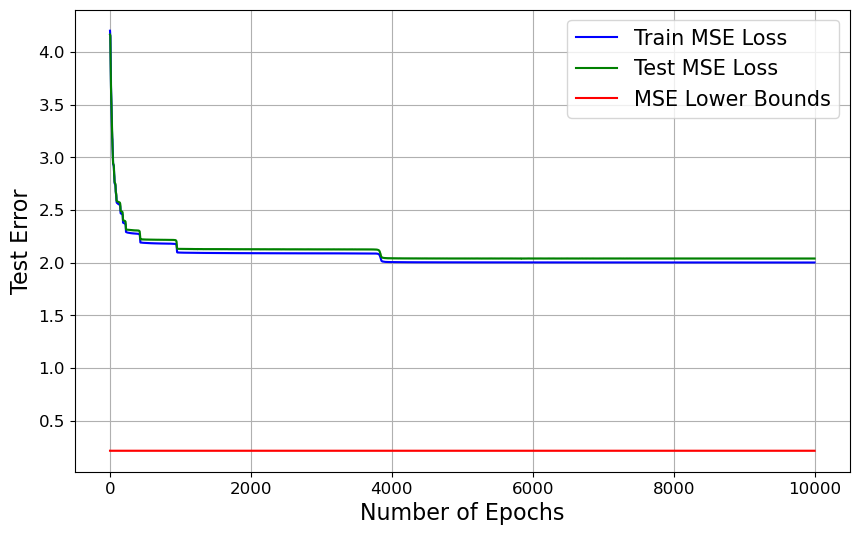

In [17]:
# # Step 3: Plot the results
# epochs_all = list(range(1, X.shape[1] + 1))
# plt.figure(figsize=(10, 6))

# # Plotting for X
# plt.fill_between(epochs_all, mean_X - ci_X, mean_X + ci_X, color='blue', alpha=0.1, zorder=0)
# plt.plot(epochs_all, mean_X, 'b-', label="Train MSE Loss", zorder=20)

# # Plotting for Y
# plt.fill_between(epochs_all, mean_Y - ci_Y, mean_Y + ci_Y, color='green', alpha=0.2, zorder=5)
# plt.plot(epochs_all, mean_Y, 'g-', label="Test MSE Loss", zorder=25)

# # Plotting for Z
# plt.fill_between(epochs_all, mean_Z - ci_Z, mean_Z + ci_Z, color='red', alpha=0.3, zorder=10)
# plt.plot(epochs_all, mean_Z, 'r-', label="MSE Lower Bound", zorder=30)

# # Additional plot settings
# plt.xlabel("Number of Epochs", fontsize=16)
# plt.ylabel("Test Error", fontsize=16)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(prop={'size': 15})
# plt.grid(True)
# plt.show()